# Calculate CSCS Distance and visualize it through PCoA and HCA

In [1]:
##install rCSCS package if it is not installed
#devtools::install_github("askerdb/rCSCS")

## Calculate CSCS Distance

In [2]:
library(rCSCS)
library(stringr)
library(dendextend)


---------------------
Welcome to dendextend version 1.5.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree



In [3]:
# Import GNPS data
My.features <- read.table("Polyporaceae_Neg_mzmine200304_quant.csv", sep = ",", row.names = 1, header=T, comment.char="")
Meta.Inf <- read.table("Metadata_Polyporaceae_Neg200304.txt", sep = "\t", header=TRUE)
My.css <- prepare_css("d4c050a864be48ffb8f6e880bd617988.selfloop")
My.features <- subset(My.features, select= -c(row.m.z, row.retention.time))
colnames(My.features) <- str_replace_all(colnames(My.features), '.Peak.area','')

In [4]:
# ion intensity 100 cutoff
My.features[My.features<100] <- 0

In [5]:
# Run Unweighted CSCS
gnps.Unw_ccs <- cscs(My.features, My.css, cosine_threshold = 0.7, weighted = FALSE)

Warning message:
"executing %dopar% sequentially: no parallel backend registered"

In [6]:
# Run Weighted CSCS
gnps.W_ccs <- cscs(My.features, My.css, cosine_threshold = 0.7, weighted = TRUE)

In [7]:
write.table(as.matrix(gnps.Unw_ccs),"unwCSCS_distance_Polyporaceae_200304.tsv",sep="\t",row.names = T,col.names = NA, quote = F)
write.table(as.matrix(gnps.W_ccs),"wCSCS_distance_Polyporaceae_200304.tsv",sep="\t",row.names = T,col.names = NA, quote = F)

## PCoA Plot in Qiime2

### This section should be performed in Qiime 2 environment.

In [ ]:
! qiime tools import --type DistanceMatrix \
    --input-path wCSCS_Polyporaceae_200304.tsv \
    --output-path wCSCS_Polyporaceae.qza

In [ ]:
! qiime diversity pcoa \
    --i-distance-matrix wCSCS_Polyporaceae.qza \
    --o-pcoa wCSCS_Polyporaceae_PCoA.qza

In [ ]:
! qiime emperor plot \
    --i-pcoa wCSCS_Polyporaceae_PCoA.qza \
    --m-metadata-file Metadata_Polyporaceae_Neg200304_for_Qiime.txt \
    --o-visualization wCSCS_Polyporaceae.qzv

## Hierarchical clustering analysis for drawing chemodendrogram

In [8]:
## HCA with unWCSCS
gnps.Unw_ccs.hc <- hclust(gnps.Unw_ccs,method = "ward.D")
gnps.Unw_ccs.dend <- as.dendrogram(gnps.Unw_ccs.hc)
labels(gnps.Unw_ccs.dend) <- Meta.Inf$ATTRIBUTE_Species[gnps.Unw_ccs.hc$order]

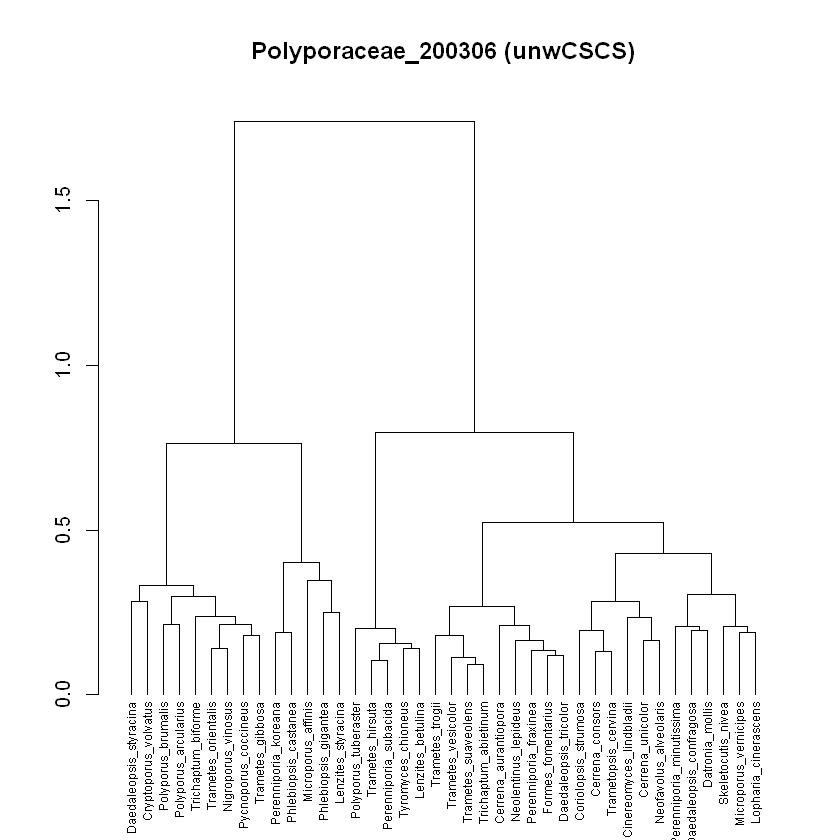

In [9]:
gnps.Unw_ccs.dend <- set(gnps.Unw_ccs.dend, "labels_cex", 0.6)
plot(gnps.Unw_ccs.dend, cex = 0.6, main="Polyporaceae_200306 (unwCSCS)")

In [10]:
## HCA with wCSCS
gnps.W_ccs.hc <- hclust(gnps.W_ccs,method = "ward.D")
gnps.W_ccs.dend <- as.dendrogram(gnps.W_ccs.hc)
labels(gnps.W_ccs.dend) <- Meta.Inf$ATTRIBUTE_Species[gnps.W_ccs.hc$order]

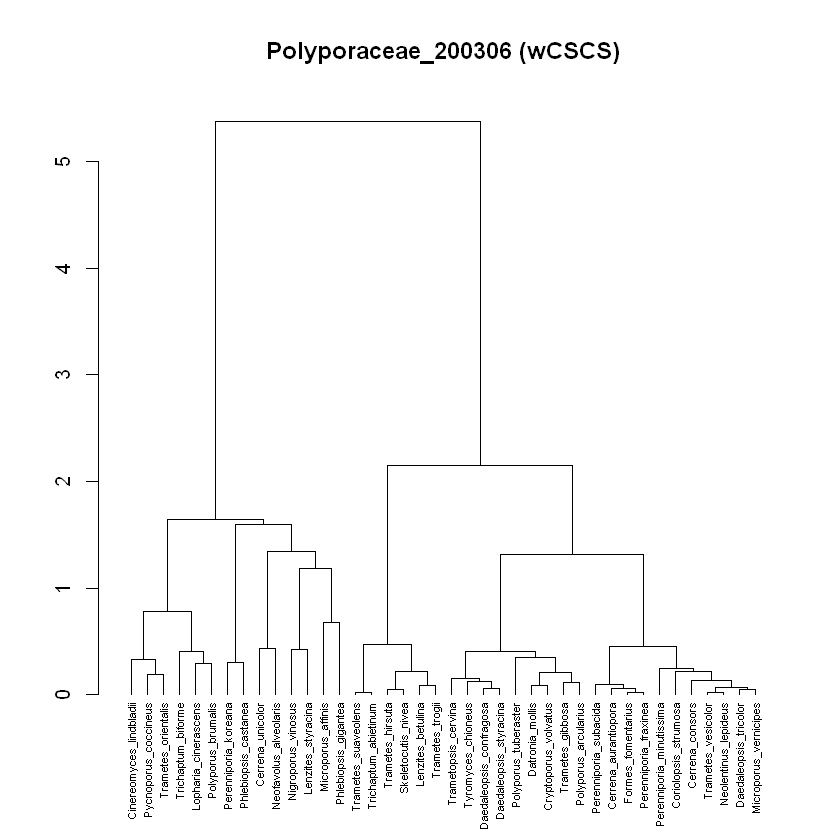

In [11]:
gnps.W_ccs.dend <- set(gnps.W_ccs.dend, "labels_cex", 0.55)
plot(gnps.W_ccs.dend, cex = 0.6, main="Polyporaceae_200306 (wCSCS)")